# Project 1 Numerical PDEs

Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
from matplotlib import cm
plt.rcParams.update(newparams)

Schemes

In [76]:
def forward_euler_OG(f, g, sigma = 1, r_val = 0.1, c = 1, M=10, N=100, T = 0.5):#h spacestep, M spacegrid, h timestep, N time grid
    h, k = 1/M, T/N
    r = k/h**2
    U = np.zeros((N+1,M+1))    # Array to store the solution, boundaries included.
    x = np.linspace(0,1,M+1)   # Gridpoints on the x-axisS
    t = np.linspace(0,T,N+1)   # Gridpoints on the t-axis
    U[0] = f(x) # Initial values
    f0 = U[0][0]
    qm = np.zeros(np.shape(U[:,1:M]))
    qm[:,0] = f0 * np.exp(-c*t)
    qm[:,-1] = g(x[1])
    U[:,-1] = qm[:,-1]
    U[:,0] = qm[:,0]
    tridiag = np.diag(np.ones(M - 2), -1) + np.diag(np.ones(M - 2), 1) - 2*np.diag(np.ones(M - 1))
    duodiag = np.diag(np.ones(M - 2), 1) - np.diag(np.ones(M - 2), -1)
    qm_duo = np.copy(qm)
    qm_duo[:,-1] *= -1
    L = np.diag(np.ones(M-1)) + k * (sigma**2 / (h**2 * 2) * x[1:M]**2 *tridiag + r_val/(h * 2) * x[1:M] * duodiag - c * np.diag(np.ones(M - 1)))
    for tn in range(1, N+1):
        U[tn,1:M] = L @ U[tn - 1,1:M] + k * (sigma**2 / (h**2 * 2) * x[1:M]**2 *qm[tn - 1] + r_val/(h * 2) * x[1:M] * qm[tn - 1])
    return x ,t, U.transpose()

Initial conditions and artiicial boundary conditions

In [77]:
def european_put(x, K = 0.5):
    return (K - x) * ((K - x) > 0)

def zero_bound(x):
    return 0

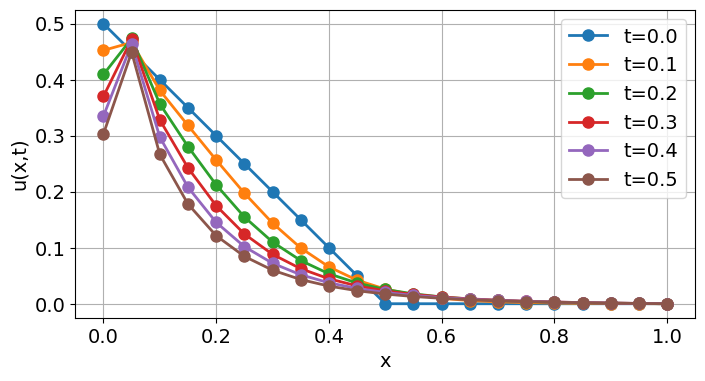

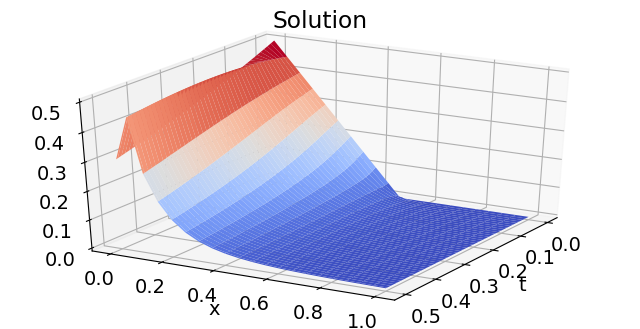

In [78]:
def plot_solution(x, t, U, txt='Solution'):
    # Plot the solution of the heat equation
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    T, X = np.meshgrid(t,x)
    # ax.plot_wireframe(T, X, U)
    ax.plot_surface(T, X, U, cmap=cm.coolwarm)
    ax.view_init(azim=30)              # Rotate the figure
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title(txt);

x, t, U = forward_euler_OG(european_put, zero_bound, M=20, N=400, T=0.5)

# Plot the solution at some points in time
plt.figure(1)
plt.clf()
tplots = np.linspace(0,t[-1],6)
k = t[1]-t[0]
anal_sol = np.zeros((len(x), len(t)))
for i, tn in enumerate(tplots):
    n = int(tn/k)
    tn = n*k
    plt.plot(x,U[:,n],'-o',label='t={:.1f}'.format(tn))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.show()

# Make a 3-d plot
plot_solution(x, t, U, txt='Solution')
plt.show()